In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("lake.csv")
time = df["time"].str.split(" |:", expand=True).rename(columns={0: "day", 1: "hour"})
df["time"] = pd.to_datetime(time["day"]) + pd.to_timedelta(time["hour"].astype(float), 'h')
df = df.set_index("time")
columns = df.columns
volumes = columns[:7]
flows = columns[7:11]
heat_fluxes = columns[21:25]

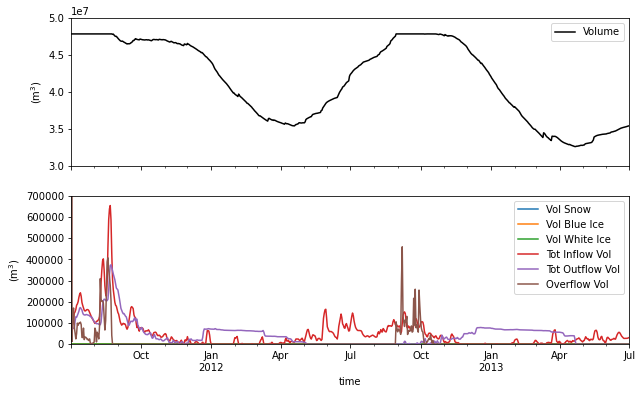

In [5]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
df[volumes[0]].plot(ax=ax[0], color="black", legend=True)
df[volumes[1:]].plot(ax=ax[1])
ylims = [(3e7, 5e7), (0, 7e5)]
for a, ylim in zip(ax, ylims):
    a.set_ylim(ylim)
    a.set_ylabel("$(\mathrm{m^3})$")

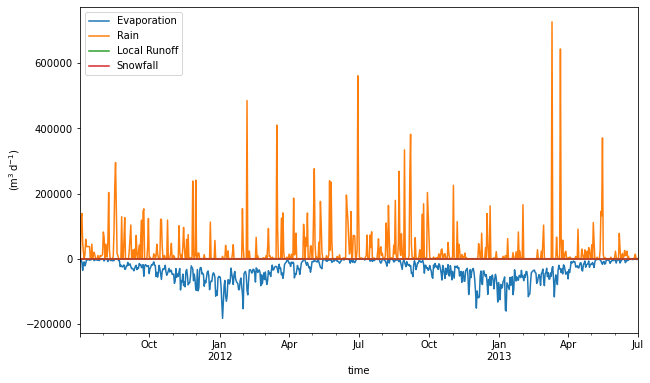

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
df[flows].plot(ax=ax)
ax.set_ylabel("$\mathrm{(m^3\,d^{-1})}$");

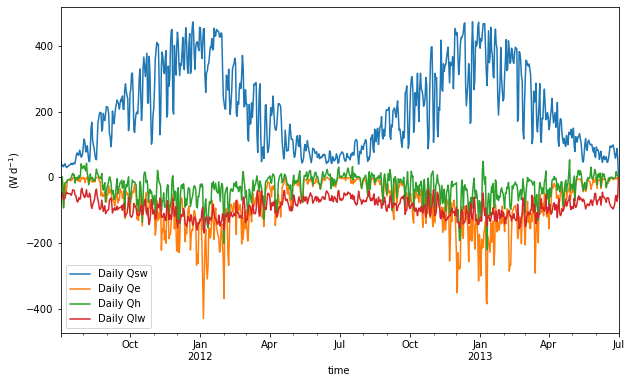

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
heat_fluxes = ['Daily Qsw','Daily Qe','Daily Qh','Daily Qlw']
df[heat_fluxes].plot(ax=ax)
ax.set_ylabel("$\mathrm{(W\,d^{-1})}$");